## <font color='blue'> Introduction to Anomaly Detection </font>

**Anomaly Detection** is a critical component in various fields such as cybersecurity, fraud detection, fault detection, and more. It involves identifying rare items, events, or observations which raise suspicions by differing significantly from the majority of the data. These rare items are often referred to as anomalies, outliers, exceptions, or aberrations.

### <font color='blue'> Types of Anomalies </font>

1. **Point Anomalies**: An individual data point is considered anomalous with respect to the rest of the data.
2. **Contextual Anomalies**: A data point is anomalous in a specific context but not otherwise.
3. **Collective Anomalies**: A collection of related data points is anomalous with respect to the entire dataset.

### <font color='blue'> Anomaly Detection Methods </font>

1. **Statistical Methods**:
   - **Z-Score**: Measures how many standard deviations an element is from the mean.
   - **IQR (Interquartile Range)**: Identifies outliers by measuring the spread of the middle 50% of the data.

2. **Distance-Based Methods**:
   - **k-Nearest Neighbors (k-NN)**: Anomalies are detected based on the distance to their k-nearest neighbors.
   - **Local Outlier Factor (LOF)**: Measures the local density deviation of a data point compared to its neighbors.

3. **Density-Based Methods**:
   - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Detects anomalies by finding regions of high density separated by regions of low density.

4. **Cluster-Based Methods**:
   - **k-Means Clustering**: Points that do not belong to any cluster or are far from the centroid are considered anomalies.
   - **HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)**: An extension of DBSCAN that can find clusters of varying densities.

5. **Classification-Based Methods**:
   - **One-Class SVM**: Trains on normal data to create a boundary that can identify anomalies.
   - **Isolation Forest**: Isolates observations by randomly selecting a feature and splitting the data.

6. **Reconstruction-Based Methods**:
   - **Autoencoders**: Neural networks trained to reconstruct input data, with high reconstruction error indicating anomalies.
   - **PCA (Principal Component Analysis)**: Projects data into a lower-dimensional space, with points far from the principal components being anomalies.

### <font color='blue'> HDBSCAN for Anomaly Detection </font>

**HDBSCAN** is an extension of DBSCAN that finds clusters of varying densities, making it particularly useful for anomaly detection in complex datasets.

### <font color='blue'> Key Concepts </font>

1. **Hierarchical Clustering**: Builds a hierarchy of clusters.
2. **Density-Based Clustering**: Identifies clusters based on the density of data points.
3. **Minimum Spanning Tree**: Constructs a tree from the data points to represent their connectivity.

### <font color='blue'> Steps in HDBSCAN Anomaly Detection </font>

1. **Construct the Minimum Spanning Tree (MST)**: Represents the data points and their mutual reachability distances.
2. **Condense the Tree**: Simplifies the MST to find clusters by collapsing edges that fall below a certain density threshold.
3. **Extract Clusters**: Identifies clusters by finding regions of higher density.
4. **Label Noise Points**: Points not belonging to any cluster are labeled as noise (anomalies).

### <font color='blue'> Advantages of HDBSCAN </font>

- **Automatic Selection of Clusters**: No need to specify the number of clusters.
- **Handling of Varying Densities**: Can detect clusters of different densities.
- **Robustness**: Effective in noisy data.

### <font color='blue'> Isolation Forest </font>

**Isolation Forest** is an anomaly detection algorithm that isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. This process of isolation is performed recursively until the point is isolated. It is particularly effective for high-dimensional datasets and works well when the anomalies are few and different from the majority of the data.

### <font color='blue'> Key Concepts of Isolation Forest </font>

1. **Isolation Principle**: Anomalies are few and different, and therefore easier to isolate.
2. **Tree Structure**: The process of isolating an observation can be represented using a tree structure where anomalies tend to have shorter paths from the root to the leaf.
3. **Anomaly Score**: The average path length from the root to a point is used to compute an anomaly score, with shorter average path lengths indicating potential anomalies.

### <font color='blue'> How Isolation Forest Works </font>

#### 1. Building Isolation Trees

An Isolation Forest consists of multiple trees, each constructed using a subset of the data. Here's how each tree is built:

- **Random Feature Selection**: Select a feature randomly from the dataset.
- **Random Split Value**: Choose a random split value between the minimum and maximum values of the selected feature.
- **Partitioning**: Split the data into two parts based on the chosen split value.
- **Recursive Partitioning**: Repeat the process recursively for each partition until each partition contains a single observation or all observations in a partition have the same values.

This recursive process creates a binary tree structure, known as an isolation tree, where the depth of the tree represents the number of splits required to isolate a point.

#### 2. Path Length Calculation

- **Path Length**: The path length of a point is the number of edges (splits) required to isolate the point in the tree.
- **Average Path Length**: The average path length is computed by averaging the path lengths across all trees in the forest.

#### 3. Anomaly Score Computation

The anomaly score is calculated based on the path length:

- **Short Path Length**: Indicates that the point is easily isolated and likely an anomaly.
- **Long Path Length**: Indicates that the point is deeply nested within the data and likely normal.

The anomaly score for a data point is given by:

$$ s(x, n) = 2^{-\frac{E(h(x))}{c(n)}} $$

where:
- $ s(x, n) $ is the anomaly score of point $ x $ with $ n $ observations.
- $ E(h(x)) $ is the average path length of $ x $ over all trees.
- $ c(n) $ is the average path length of unsuccessful searches in a Binary Search Tree, used to normalize the path length.

#### 4. Thresholding

- **Score Interpretation**: An anomaly score close to 1 indicates a high likelihood of the point being an anomaly, while a score close to 0 indicates a normal point.
- **Threshold Setting**: A threshold can be set to classify points as anomalies or normal based on their anomaly scores.


### <font color='blue'> Takeaways </font>

Anomaly detection encompasses various methods, each suited for different types of data and anomalies. HDBSCAN, with its ability to detect clusters of varying densities and robustness to noise, is a powerful tool in this domain. Understanding the underlying principles and appropriate contexts for each method ensures effective anomaly detection in diverse applications.

### Code Applications
---

In [ ]:
!pip install -q hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 9.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039294 sha256=08aad88be70af612b66bd50d776b34dff5eb92f7cc14b3fe2e3f21f7b69ef72b
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [ ]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest

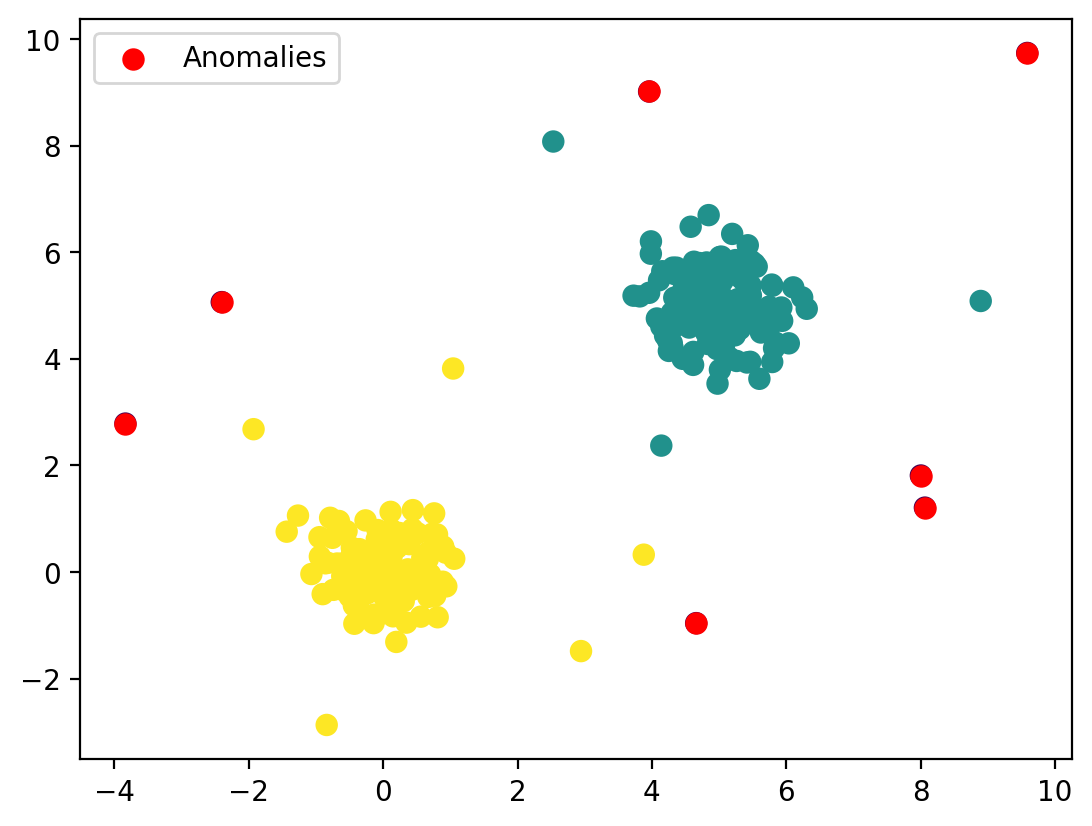

In [ ]:

# Generate sample data
data, _ = make_blobs(n_samples=300, centers=[[0, 0], [5, 5]], cluster_std=0.5)
# Add some random noise points
data = np.vstack([data, np.random.uniform(low=-5, high=10, size=(20, 2))])

# Fit HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(data)

# Identify anomalies (noise points)
anomalies = data[cluster_labels == -1]

# Plotting the results
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', s=50, label='Anomalies')
plt.legend()
plt.show()

In [ ]:
X = data

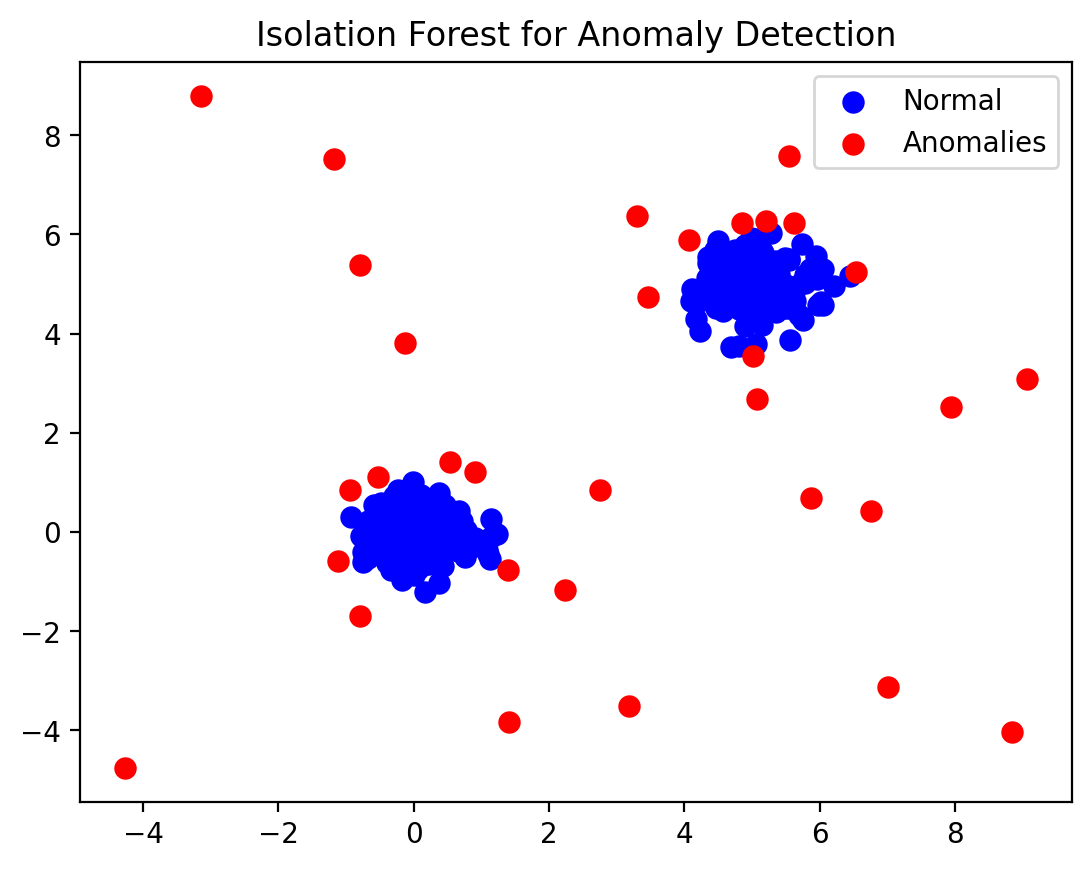

In [ ]:
# Fit the Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=123)
clf.fit(X)
y_pred = clf.predict(X)

# Separate normal data points and anomalies
normal = X[y_pred == 1]
anomalies = X[y_pred == -1]

# Plotting the results
plt.scatter(normal[:, 0], normal[:, 1], c='blue', s=50, label='Normal')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', s=50, label='Anomalies')
plt.legend()
plt.title("Isolation Forest for Anomaly Detection")
plt.show()